# Module

In [1]:
# required module
import numpy as np
from PIL import Image
from pylab import *

#torch
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms

In [2]:
#obtain the example training data

num=128*128
num_data=328-1

def callingFunc(i):
    x1 = Image.open(
        r'data/data2fIm/input2d'+str(i)+'.jpg').convert('L');
    y1 = np.asarray(x1.getdata(), dtype=np.float64).reshape((x1.size[1], x1.size[0]));
    target_x1 = Image.open(
        r'data/label2fIm/target2l'+str(i)+'.jpg').convert('L');
    target_y1 = np.asarray(target_x1.getdata(), dtype=np.float64).reshape(
        (target_x1.size[1], target_x1.size[0]));
    y_dat1 = np.asarray(y1, dtype=np.uint8);
    y_dat1_Im = transforms.ToTensor()(y_dat1).unsqueeze_(0);
    
    target_dat1_y = np.asarray(target_y1, dtype=np.uint8);
    target_dat1_y_Im = transforms.ToTensor()(target_dat1_y).unsqueeze_(0)   ;
    
    labels=torch.round(target_dat1_y_Im.view(-1, num)[0])
    
    return y_dat1, y_dat1_Im, target_dat1_y, target_dat1_y_Im, labels

#data
print(callingFunc(1)[1].shape)
print(callingFunc(1)[3].shape)

torch.Size([1, 1, 128, 128])
torch.Size([1, 1, 128, 128])


In [3]:
inputs = [callingFunc(i+1)[1] for i in range(num_data)]
labels = [callingFunc(i+1)[4] for i in range(num_data)]

## Visualization of data

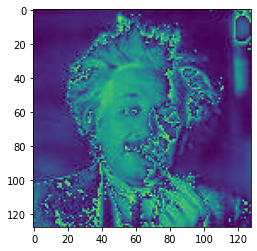

In [4]:
plt.imshow(callingFunc(1)[0])

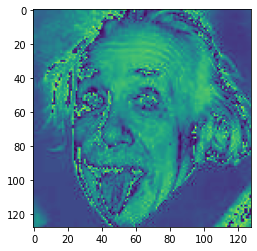

In [5]:
plt.imshow(callingFunc(2)[0])

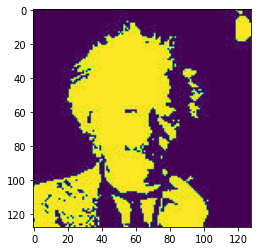

In [6]:
plt.imshow(callingFunc(1)[2])

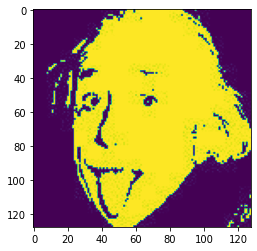

In [7]:
plt.imshow(callingFunc(2)[2])

# Model

In [83]:
#modeling with 16384 x 20 x 20 x 16384



class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # input is last input 6, and output is 16, just 16, and kernel size is 5
        self.fc1 = nn.Linear(num, 30)
        #input of 16*5*5, output is 120 just randomw
        self.fc2 = nn.Linear(30, 30)
        #input of last number 120, and 84 randome
        self.fc3 = nn.Linear(30, num)
        #output is 62*29*29  corrspond all the data.
        self.softmax =nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, num)            # -> n, 16384
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 120
        x = self.softmax(self.fc3(x))    # -> n, 52142
    
        return x
    
net = Net()

In [93]:
#devices, model, criterion, optimizer
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Net()
model = Net().to(device)
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.4)

# Training

In [ ]:
print('Traning Start')
for epoch in range(1000):  # loop over the dataset multiple times
    
    for ix in range(num_data):
        running_loss = 0.0

        # get the inputs; data is a list of [inputs, labels]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs[ix])[0]

        loss = criterion(outputs,labels[ix])
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print(epoch,"iteration L= ",running_loss);

print('Finished Training')

Traning Start
0 iteration L=  0.694217324256897
1 iteration L=  0.6937574148178101
2 iteration L=  0.6933587789535522
3 iteration L=  0.6928202509880066
4 iteration L=  0.6923724412918091
5 iteration L=  0.6919116377830505
6 iteration L=  0.6914577484130859
7 iteration L=  0.6909950971603394
8 iteration L=  0.6905405521392822
9 iteration L=  0.6900321841239929
10 iteration L=  0.6894950866699219
11 iteration L=  0.6889405250549316
12 iteration L=  0.6883392333984375
13 iteration L=  0.6876900792121887
14 iteration L=  0.6870365738868713
15 iteration L=  0.6863114833831787
16 iteration L=  0.6855353116989136
17 iteration L=  0.6846495270729065
18 iteration L=  0.68369460105896
19 iteration L=  0.6825853586196899
20 iteration L=  0.6813720464706421
21 iteration L=  0.6799615621566772
22 iteration L=  0.6783722043037415
23 iteration L=  0.6765453815460205
24 iteration L=  0.6744190454483032
25 iteration L=  0.6719553470611572
26 iteration L=  0.6690822243690491
27 iteration L=  0.66578298

222 iteration L=  0.18998432159423828
223 iteration L=  0.19131462275981903
224 iteration L=  0.18904265761375427
225 iteration L=  0.18832626938819885
226 iteration L=  0.18830695748329163
227 iteration L=  0.1883707493543625
228 iteration L=  0.18846212327480316
229 iteration L=  0.18793226778507233
230 iteration L=  0.1875705122947693
231 iteration L=  0.18777218461036682
232 iteration L=  0.1865093857049942
233 iteration L=  0.18662673234939575
234 iteration L=  0.18582090735435486
235 iteration L=  0.18607360124588013
236 iteration L=  0.1863499879837036
237 iteration L=  0.18556448817253113
238 iteration L=  0.18425564467906952
239 iteration L=  0.183820903301239
240 iteration L=  0.18374699354171753
241 iteration L=  0.18433105945587158
242 iteration L=  0.18318063020706177
243 iteration L=  0.1827213168144226
244 iteration L=  0.18255816400051117
245 iteration L=  0.18264882266521454
246 iteration L=  0.18257901072502136
247 iteration L=  0.18258994817733765
248 iteration L=  0

In [ ]:
outputs = net(inputs[0])[0]
train_acc = torch.sum(torch.round(torch.flatten(outputs)) == labels[0])/(num)
print("Training Accuracy =",np.round(np.array(train_acc),2))

## Training Result

torch.Size([1, 1, 128, 128])


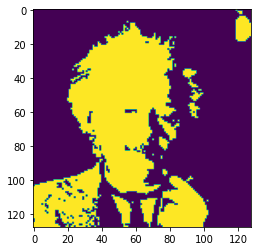

In [88]:
#labeling data
target1=labels[0].reshape([1,1,128,128])
print(target1.shape)
plt.imshow(target1[0][0].detach().cpu().numpy())

torch.Size([1, 1, 128, 128])


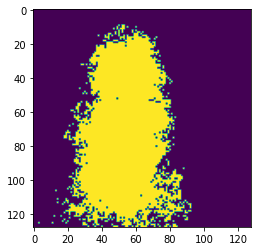

In [89]:
# trained data
outputs = net(inputs[0])
output1=torch.round(outputs.reshape([1,1,128,128]))
print(output1.shape)
plt.imshow(output1[0][0].detach().cpu().numpy())

# Validating Model

torch.Size([1, 1, 128, 128])


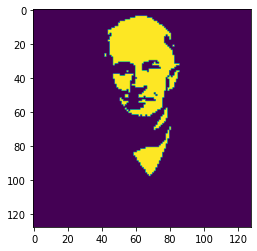

In [90]:
#labeling data
target1=callingFunc(num_data)[4].reshape([1,1,128,128])
print(target1.shape)
plt.imshow(target1[0][0].detach().cpu().numpy())

torch.Size([1, 1, 128, 128])


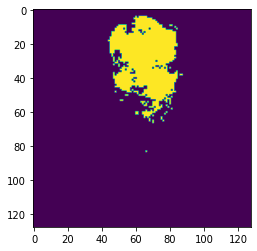

In [91]:
# trained data
outputs = net(callingFunc(num_data)[1])
output1=torch.round(outputs.reshape([1,1,128,128]))
print(output1.shape)
plt.imshow(output1[0][0].detach().cpu().numpy())

In [92]:
train_acc = torch.sum(torch.round(torch.flatten(output1)) == callingFunc(num_data)[4])/(num)
print("Training Accuracy =",np.round(np.array(train_acc),2))

Training Accuracy = 0.96


In [58]:
torch.round(torch.flatten(outputs)) 


tensor([0., 0., 0.,  ..., 0., 0., 0.], grad_fn=<RoundBackward>)

In [61]:
callingFunc(num_data)[4]

tensor([0., 0., 0.,  ..., 0., 0., 0.])

## Visualization